In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 200

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

# Постановка задачи

<img src="../images/petal_sepal.jpg" />

## Классы задачи

<table width="100%" border=0>
    <tr>
        <td>Iris Setosa</td>
        <td>Iris Virginica</td>
        <td>Versicolor</td>
    </tr>
    <tr>
        <td width="33%"><img src="../images/iris_setosa.jpg"  /></td>
        <td width="33%"><img src="../images/iris_virginica.jpg" /></td>
        <td width="33%"><img src="../images/iris_versicolor.jpg" /></td>
    </tr>
</table>


## Загружаем данные

In [4]:
from sklearn.datasets import load_iris

In [5]:
bunch = load_iris()

In [6]:
print(bunch.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Классы сбалансированные, поэтому будем использовать метрику `accuracy`.

In [7]:
df = pd.DataFrame(data=bunch.data, columns=bunch.feature_names) 

In [8]:
df['class'] = bunch.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
renaming = {i:c for i,c in zip(range(3), bunch.target_names)}
renaming

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [11]:
renaming_back = {c:i for i,c in zip(range(3), bunch.target_names)}
renaming_back

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [12]:
df['class'] = df['class'].map(renaming)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df.isnull().any(axis=1).sum()

0

In [15]:
df.groupby('class').describe()

petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
class                                                                       
setosa                  50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            \
                      count   mean       std  min  25%  50%  75%  max   
class                                                                   
setosa                 50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6   
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8   
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5   

           sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                
                      count   mean       std  min    25%  50%    75%  max  
class                                                                      
setosa                 50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4  
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

# Визуализация и исследование

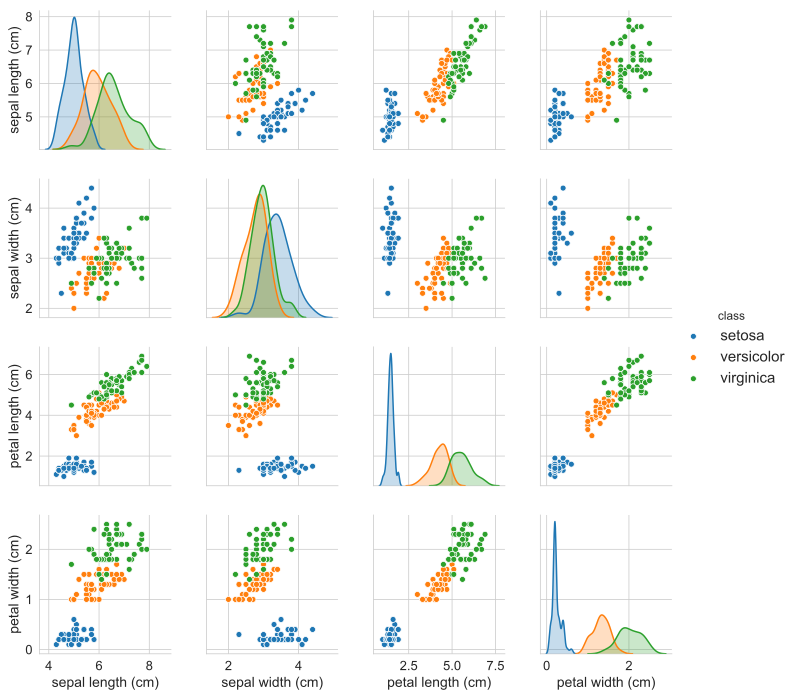

In [16]:
sns.pairplot(df, hue='class');

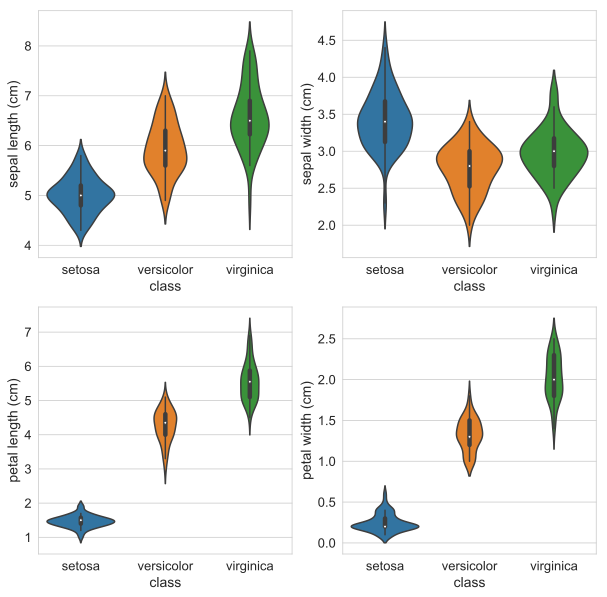

In [17]:
plt.figure(figsize=(10, 10))

for index, column in enumerate(df.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, index + 1)
    sns.violinplot(x='class', y=column, data=df)

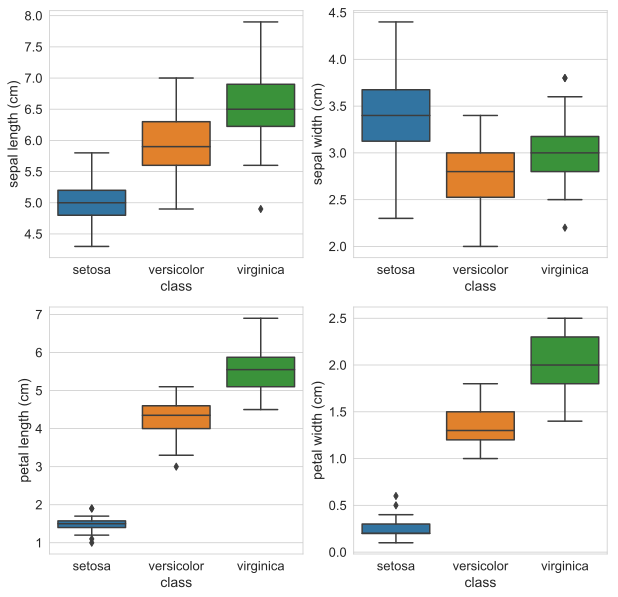

In [18]:
plt.figure(figsize=(10, 10))

for index, column in enumerate(df.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, index + 1)
    sns.boxplot(x='class', y=column, data=df)

# Классификация

In [62]:
X = df.drop(['class'], axis=1).values
y = bunch.target

In [63]:
X.shape, y.shape

((150, 4), (150,))

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

## Стратифицированная перекрестная проверка

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [30]:
clf = LogisticRegression()

In [40]:
cv_scores = cross_val_score(clf, X, y, cv=10) # StratifiedKFold(10)
print('Average score: {}'.format(np.mean(cv_scores)));

Average score: 0.9533333333333334


In [41]:
cv_scores

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 0.93333333, 1.        , 1.        ])

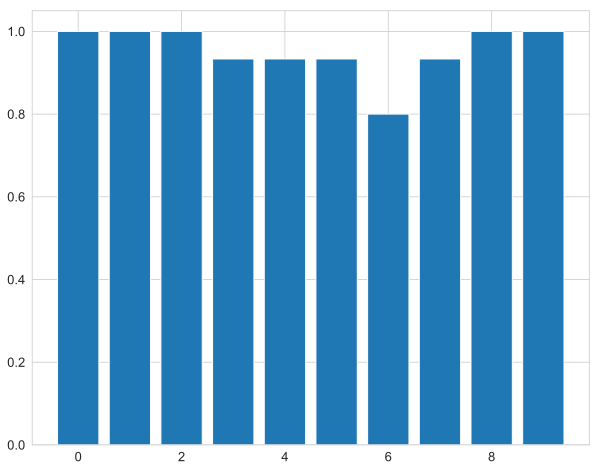

In [42]:
plt.bar(np.arange(10), cv_scores);

## Подбор оптимальных гиперпараметров по сетке

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier()

parameter_grid = { 'n_neighbors': [1, 2, 4, 8, 16, 32, 64] }

cross_validation = StratifiedKFold(n_splits=10, random_state=26, shuffle=True)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

In [64]:
grid_search.fit(X, y);
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333334
Best parameters: {'n_neighbors': 16}


In [47]:
best_one = grid_search.best_estimator_
best_one

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [48]:
best_one.fit(X, y);

## Визуализация классификатора

In [52]:
from scikitplot import classifier_factory

In [53]:
best_one = classifier_factory(best_one)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function classifier_factory is deprecated; This will be removed in v0.4.0. The Factory API has been deprecated. Please migrate existing code into the various new modules of the Functions API. Please note that the interface of those functions will likely be different from that of the Factory API.
  warnings.warn(msg, category=DeprecationWarning)


/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=DeprecationWarning)


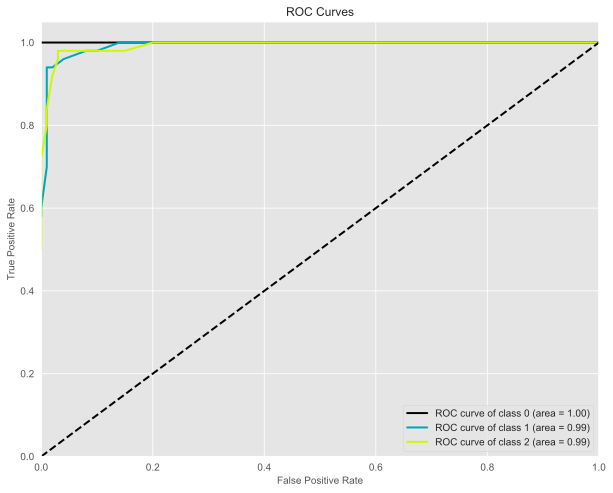

In [54]:
best_one.plot_roc_curve(X, y, cv=10, random_state=1, curves=('each_class'));

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sandpiturtle/Library/Python/3.6/lib/python/site-packages/scikitplot/plotters.py:179: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  ax.grid('off')


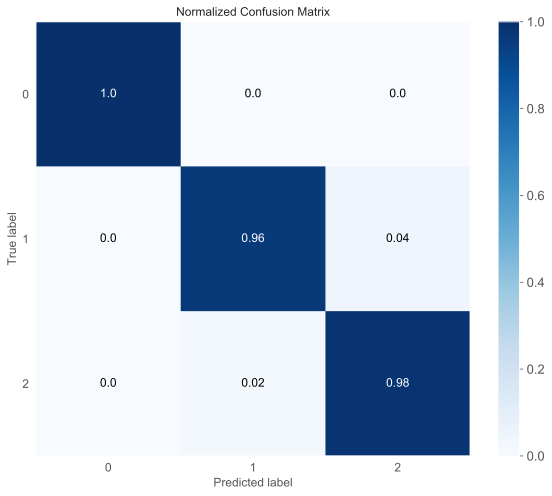

In [55]:
best_one.plot_confusion_matrix(X, y, cv=10, text_fontsize='large', normalize=True);

## Граница принятия решений

In [65]:
def plot_decision_boundary(clf, h=0.1):
    x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    f1 = np.array([X[:, 0].mean()] * xx.ravel().shape[0])
    f2 = np.array([X[:, 1].mean()] * xx.ravel().shape[0])
    
    Z = clf.predict(np.c_[f1, f2, xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,     yy,        Z, cmap=plt.cm.copper, alpha=0.8);
    plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.autumn);
    plt.title('Decision boundary');
    plt.xlabel(bunch.feature_names[-2]);
    plt.ylabel(bunch.feature_names[-1]);

In [66]:
h = 0.1
x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1
y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f1 = np.array([X[:, 0].mean()] * xx.ravel().shape[0])
f2 = np.array([X[:, 1].mean()] * xx.ravel().shape[0])

Z = best_one.predict(np.c_[f1, f2, xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

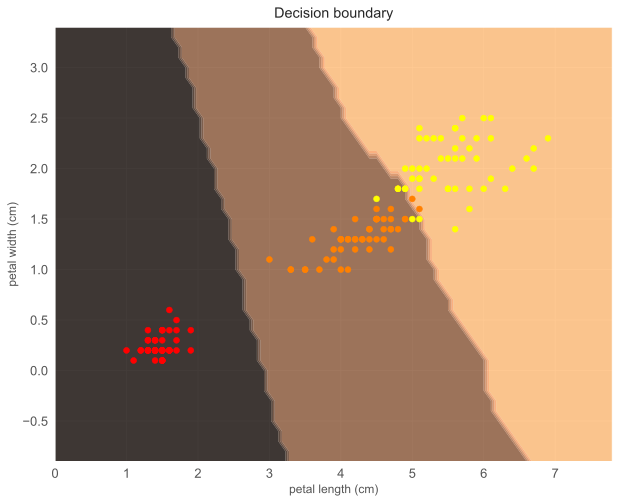

In [67]:
plt.contourf(xx, yy, Z,            cmap=plt.cm.copper, alpha=0.8);
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.autumn);
plt.title('Decision boundary');
plt.xlabel(bunch.feature_names[-2]);
plt.ylabel(bunch.feature_names[-1]);

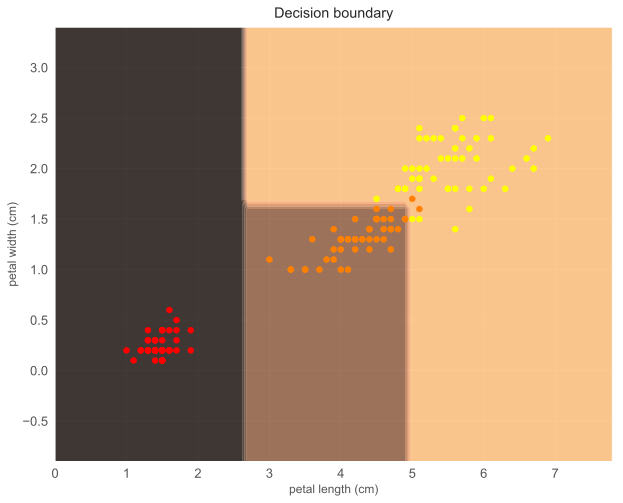

In [59]:
from sklearn.tree import DecisionTreeClassifier

svc = DecisionTreeClassifier()
svc.fit(X_train, y_train);

plot_decision_boundary(svc)

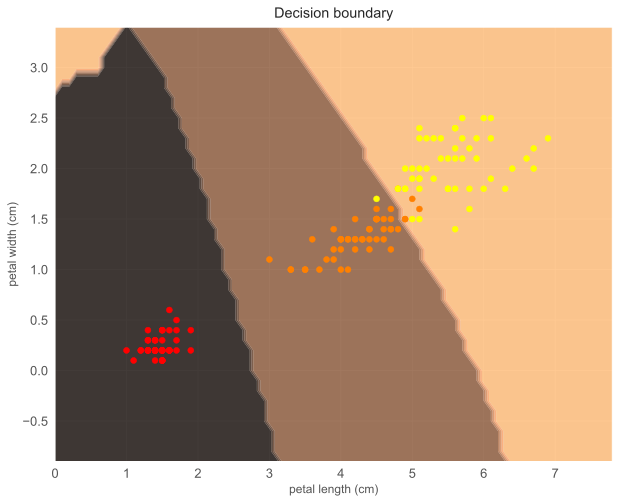

In [68]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train);

plot_decision_boundary(svc)

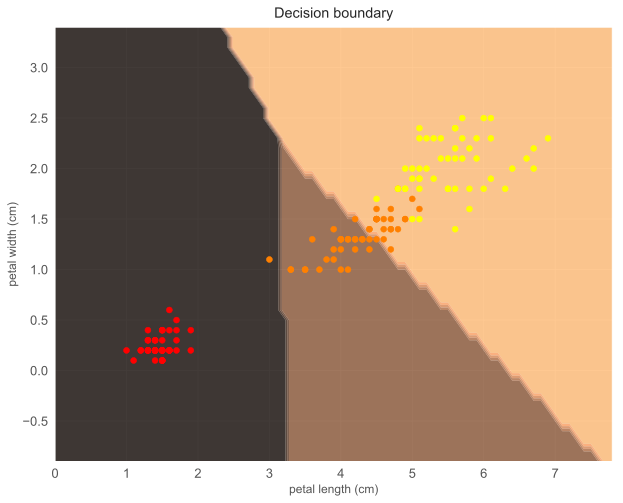

In [69]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train);

plot_decision_boundary(clf)